In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import random

from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers

In [ ]:
# 데이터파일 불러오기
drive.mount('/gdrive')
df = pd.read_csv('/gdrive/My Drive/ML_전기/텀프/image-10k.csv', header=None)

X = df.iloc[:, 1:].values     # 데이터샘플
y = df.iloc[:, 0].values      # 타겟레이블

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Data preprocessing
x_train = x_train / 255.
x_test = x_test / 255.

y_train = to_categorical(y = y_train, num_classes = 10)
y_test = to_categorical(y = y_test, num_classes = 10)

In [ ]:
# Buld model (Keras ver.)
model = Sequential()
model.add(layers.Dense(units = 512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dense(units = 10))

Adam = optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = Adam, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 50, validation_split = .3, epochs = 80)

Epoch 1/80
70/70 [==============================] - 1s 11ms/step - loss: 0.8619 - accuracy: 0.7043 - val_loss: 0.6499 - val_accuracy: 0.7747
Epoch 2/80
70/70 [==============================] - 1s 8ms/step - loss: 0.5684 - accuracy: 0.8020 - val_loss: 0.5351 - val_accuracy: 0.8207
Epoch 3/80
70/70 [==============================] - 1s 8ms/step - loss: 0.5131 - accuracy: 0.8200 - val_loss: 0.5663 - val_accuracy: 0.8100
Epoch 4/80
70/70 [==============================] - 1s 8ms/step - loss: 0.4530 - accuracy: 0.8377 - val_loss: 0.5617 - val_accuracy: 0.8087
Epoch 5/80
70/70 [==============================] - 1s 8ms/step - loss: 0.4160 - accuracy: 0.8517 - val_loss: 0.4939 - val_accuracy: 0.8287
Epoch 6/80
70/70 [==============================] - 1s 9ms/step - loss: 0.3781 - accuracy: 0.8649 - val_loss: 0.4917 - val_accuracy: 0.8287
Epoch 7/80
70/70 [==============================] - 1s 8ms/step - loss: 0.3504 - accuracy: 0.8771 - val_loss: 0.4991 - val_accuracy: 0.8360
Epoch 8/80
70/70 [=

157/157 [==============================] - 1s 3ms/step - loss: 0.7827 - accuracy: 0.8540
accuracy:  0.8539999723434448


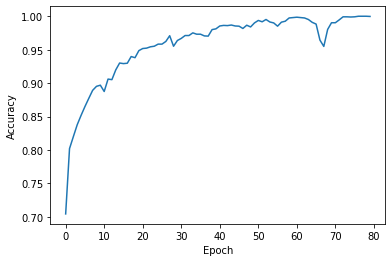

In [ ]:
# Draw accuracy graph during train + Evaluate model's accuracy with test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print('accuracy: ', test_acc)

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

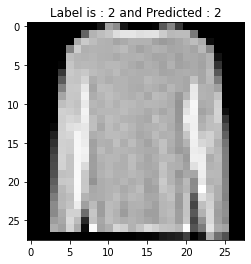

In [ ]:
# Select random one data and test + plot
y_pred = model.predict(x_test)
rand_idx = np.random.randint(0,5000)

title = 'Label is : ' + str(np.argmax(y_test[rand_idx])) + ' and Predicted : ' + str(np.argmax(y_pred[rand_idx]))
img = x_test[rand_idx].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.title(title)
plt.show()